# Домашнее задание 1

Выполнили студенты 25ИАД:
1) Данил Ерёменко
2) Кудасов Максим

Вариант -- 7

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import copy

In [13]:
# Считываем датасет
name_of_cols = [
    "Age",
    "Number of dependents",
    "Income",
    "Duration of stay",
    "Vehicle appraisal",
    "Loan amount",
]

path_to_file = "Materials/25MAG_HW_1_v7.xls"
df = pd.read_excel(path_to_file, header=None, names=name_of_cols)
df

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
0,42.0,4.0,43300.0,9.0,44000.0,437000.0
1,44.0,NaN,12100.0,13.0,12000.0,123000.0
2,47.0,3.0,28700.0,14.0,30000.0,293000.0
3,40.0,1.0,7500.0,11.0,7000.0,74000.0
4,39.0,1.0,9400.0,11.0,9000.0,93000.0
5,NaN,0.0,4900.0,7.0,4000.0,42000.0
6,50.0,3.0,14700.0,16.0,NaN,153000.0
7,56.0,4.0,25500.0,19.0,28000.0,268000.0
8,50.0,3.0,16800.0,16.0,18000.0,175000.0
9,39.0,2.0,NaN,9.0,29000.0,292000.0


## Быстрый анализ признаков и их распределений

Далее проведём быстрый визуальный анализ по каждому из признаков:
1) Найдём среднее, стандартное отклонение, медиану и квартили
2) Построим гистограммы для каждого из признаков
3) Сделаем вывод по уже имеющимся данным о возможном распределении в данных

In [26]:
# По каждому признаку найдём основные характеристики
# Как читать:
# mean -- среднее
# std -- стандартное отклонение
# 25%, 50%, 75% -- квартили
# 50% -- медиана

df.describe(percentiles=[.25, .50, .75])

,Age,Number of dependents,Income,Duration of stay,Vehicle appraisal,Loan amount
count,49.000000,49.0,49.000000,50.00000,49.000000,50.00000
mean,39.265306,2.0,19332.653061,9.84000,21081.632653,199960.00000
std,8.960040,1.0,9977.503607,4.87124,11638.364602,97963.54174
min,19.000000,0.0,1500.000000,0.00000,0.000000,4000.00000
25%,34.000000,1.0,12100.000000,6.00000,13000.000000,128500.00000
50%,40.000000,2.0,16800.000000,10.00000,19000.000000,193000.00000
75%,46.000000,3.0,28700.000000,14.00000,30000.000000,292750.00000
max,56.000000,4.0,43300.000000,19.00000,50000.000000,437000.00000


In [95]:
def draw_plots(table: pd.DataFrame):
    for feature in table.columns:
        values = table[feature].dropna()

        fig, axes = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)
        ax_hist, ax_box = axes

        fig.suptitle(feature, fontsize=14)

        ax_hist.hist(values, bins=20)
        ax_box.boxplot(values, vert=False)

        plt.show()


def draw_corr_plots(table: pd.DataFrame):
    for (x, y) in combinations(table.columns, 2):
        if x == y:
            continue

        corrs = table[[x, y]].dropna()
        corr_coeff = corrs.corr(method="pearson").iloc[0, 1]
        
        if abs(corr_coeff) < 0.5:
            continue

        plt.scatter(corrs[x], corrs[y])
        plt.xlabel(x)
        plt.ylabel(y)

        plt.show()

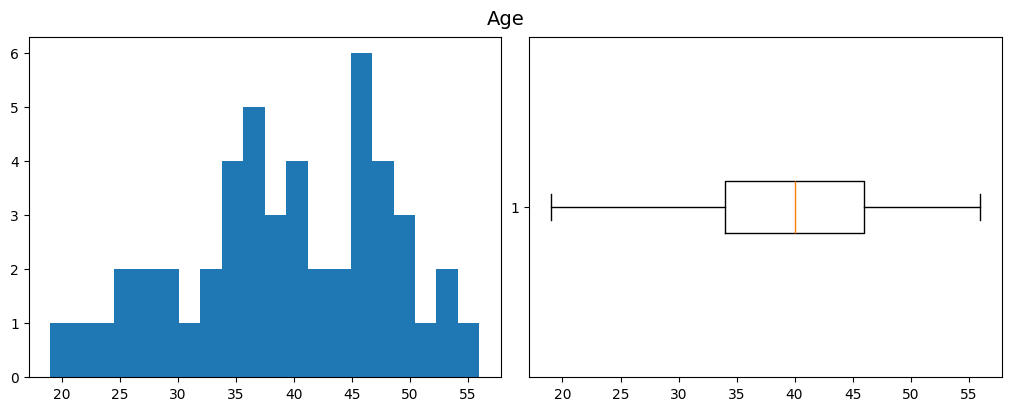

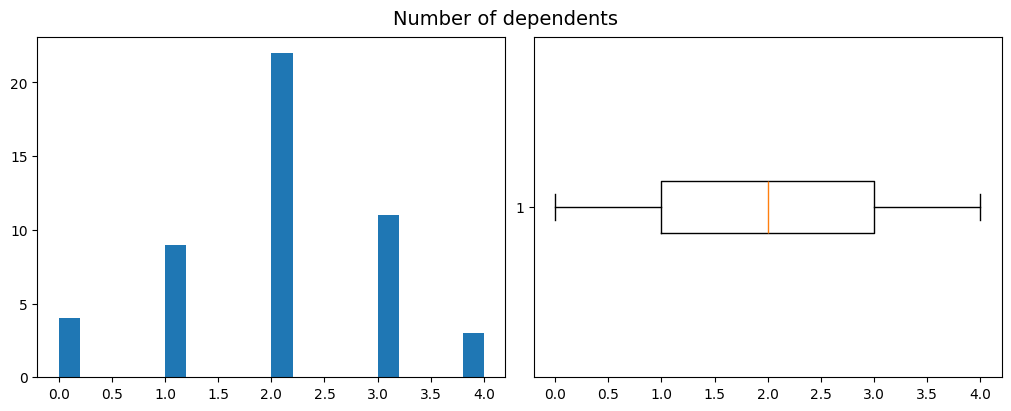

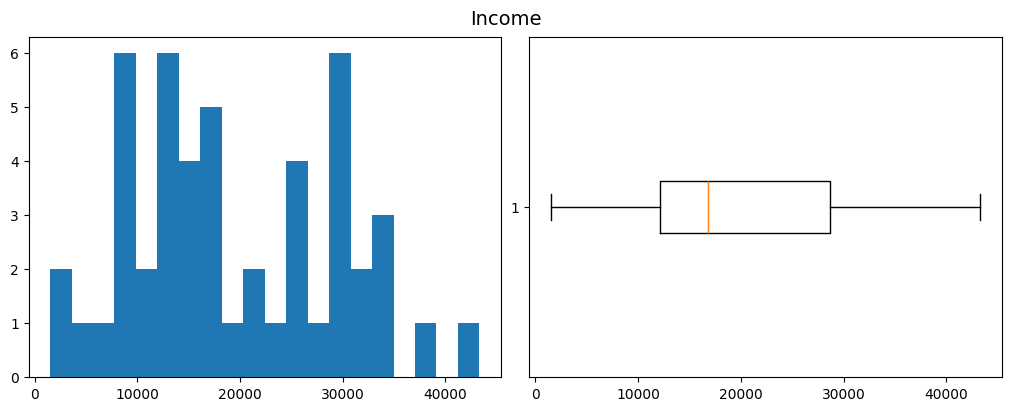

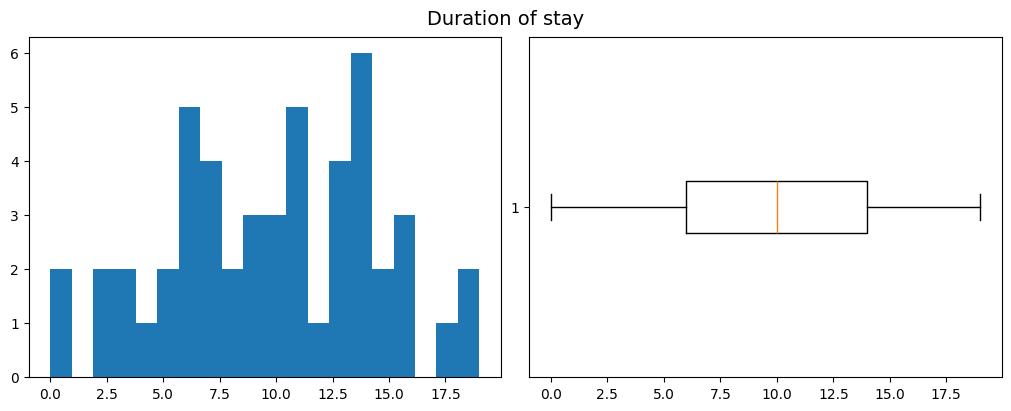

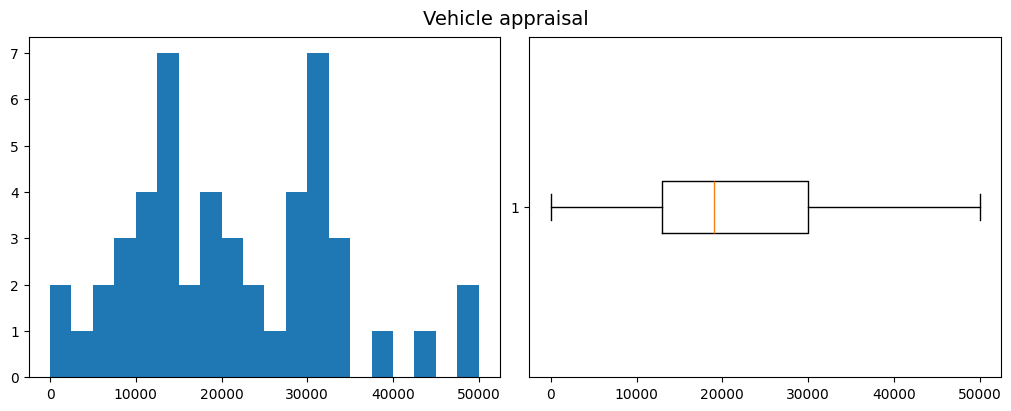

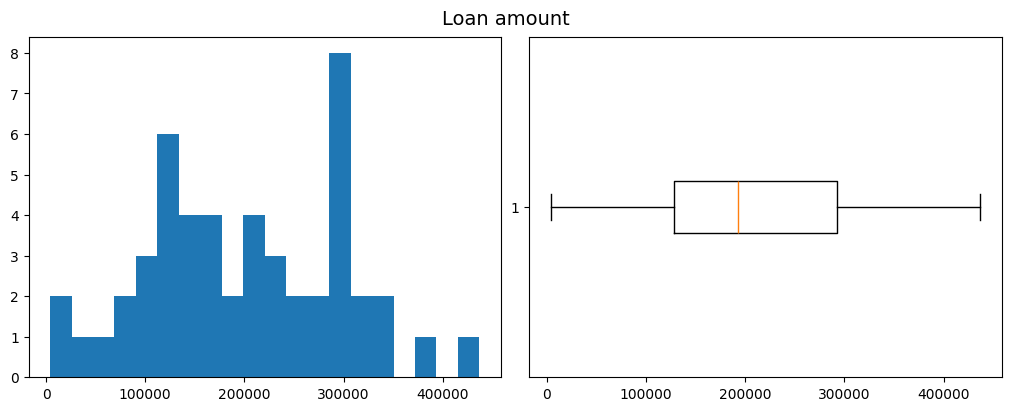

In [96]:
# Рисуем карты самих признаков
draw_plots(df)

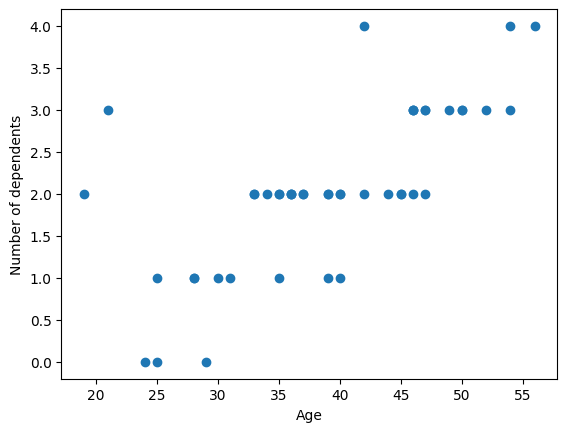

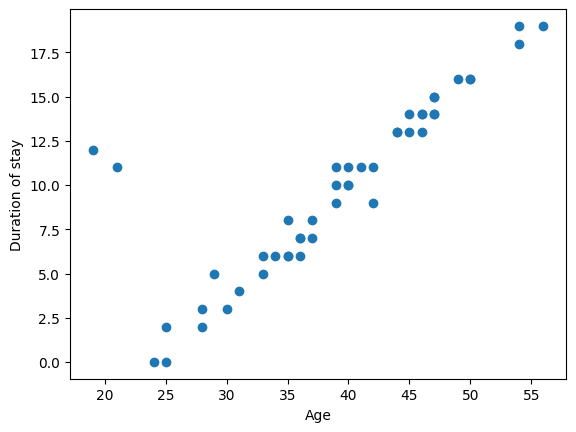

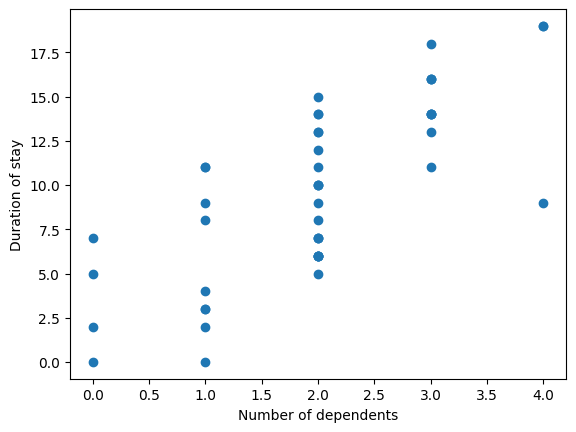

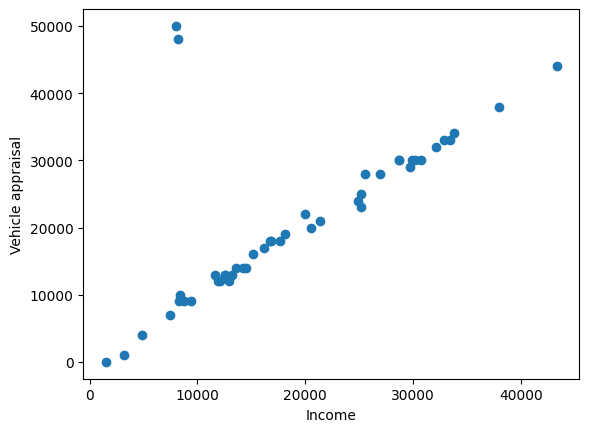

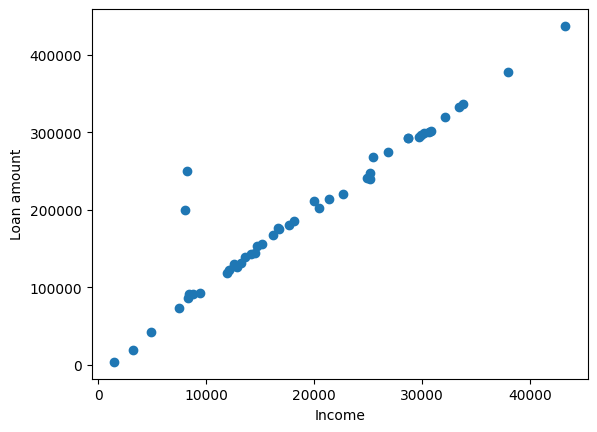

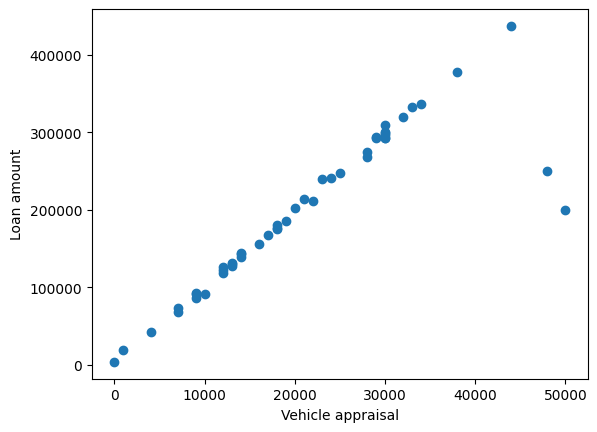

In [97]:
# А теперь их распределения между собой (для значимых величин)
draw_corr_plots(df)

Анализируя графики зависимостей, видно, что некоторые признаки между собой ОЧЕНЬ заметно коррелируют, при том практически линейно.
Среди них:
1) Зависимость числа иждивенцев от возраста. Есть три группы: 1 и меньше иждивенцев статистически имеют люди в возрасте от 25 до 40; 2 иждивенцами обладают люди в возрасте примерно от 32 до 47 (заметно выраженно); 3-4 иждивенцами обладают в преобладающем числе люди в возрасте от 45 до 55.
2) Зависимость возраста от срока пребывания в регионе. Практически линейная зависимость: чем старше человек, тем он дольше находится в регионе.
3) Число иждивенцев от срока проживания также линейно зависит, но сроки достаточно широкие, поэтому тут скорее проще сказать, что статистически число иждивенцев растёт со сроком пребывания, но очень неохотно.
4) Зависимость оценки автомобиля от его дохода тоже линейна: чем больше доход, тем дороже автомобиль.
5) Далее также видно: чем выше доход, тем выше и выбранный кредит, при том зависимость линейная
6) ...и, следовательно, линейная зависимость есть и у оценки автомобиля от размера кредита

Отсюда можно сделать вывод, что тут почти все факторы между собой очень сильно коррелируют, при том их можно отнести в две группы:
1) Группа "Возраст, время проживания, число иждивенцев"
2) Группа "Доход, кредит, автомобиль"

И между собой группы коррелируют незначительно (коэфф. корреляции ниже 0.5), поэтому можно уже предположить, что скрытых фактора будет не менее 2-х, но скорее всего либо 2, либо 3, т.к. корреляция на 0.3 между группами есть, но в ней достаточно мало полезных данных для анализа.

## Предобработка данных

Есть несколько способов обработать пропуски в данных, среди них:
1) Вставка средним значением/медианой
2) Вставка среднего/медианы внутри группы (например, внутри признака смотреть на разные жёстко-разделённые группы по доходу)
2) Удаление строки с пропуском (не можем себе позволить здесь)
3) Регрессионна (обучаем регрессионную модель на имеющихся данных и заполняем с помощью обученной модели значения в признаках)

Из-за сильной корреляции в данных, брать константу будто бы не имеет смысла (будет смещение дисперсии), т.к. нет как жёсткого разграничения между группами (она, по сути, одна на каждый признак), а удаление клиента мы себе позволить не можем для дальнейшего анализа, поэтому выберем вариант с регрессией

Использовать будем готовую регрессионку из библиотеки scikit-learn.

In [10]:
X_data = df.to_numpy()

In [3]:
# Центрируем и нормализуем (через L2-норму)
X_centered = X_data - X_data.mean(axis=0)
X_cleaned = X_centered / np.linalg.norm(X_centered, axis=0)
X_cleaned

array([[nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, na

In [4]:
# Проверяем корректность центрировки и нормировки
assert(np.allclose(X_cleaned, X_cleaned - X_cleaned.mean(axis=0))) # центр должен быть в нуле
assert(np.allclose(np.linalg.norm(X_cleaned, axis=0), np.array([1] * X_cleaned.shape[1]))) # l2 норма должна быть равна 1

AssertionError: 

## SVD разложение

Далее проведём разложение полученных данных для того, чтобы проанализировать данные на наличие скрытых признаков, на выявление главных признаков и зависимости между скрытыми признаками и изначальными

In [ ]:
# Раскладываем
U, S, Vt = np.linalg.svd(X_cleaned, full_matrices=False)
S_r = np.diag(S)

In [ ]:
print(f"U shape = {U.shape}")
print(f"S shape = {S.shape}")
print(f"Vt shape = {Vt.shape}")

U shape = (15, 5)
S shape = (5,)
Vt shape = (5, 5)


In [ ]:
# Проверяем корректность разложения
assert(np.allclose(X_cleaned, U @ S_r @ Vt))

In [ ]:
# Смотрим сингулярные числа
print(f"Сингулярные числа:\n{S}")
print(f"Квадраты сингулярных чисел:\n{S**2}")
print(f"Вклад факторов в вариацию данных (в %):")
contrib = S**2 / np.sum(S**2) * 100
print(contrib)

Сингулярные числа:
[1.65969941 1.33224208 0.61407764 0.25488052 0.16874093]
Квадраты сингулярных чисел:
[2.75460213 1.77486895 0.37709134 0.06496408 0.0284735 ]
Вклад факторов в вариацию данных (в %):
[55.09204252 35.49737894  7.54182686  1.29928162  0.56947006]


In [ ]:
# Ищем первые k самых важных факторов
k = 2
sum_contrib = np.sum(contrib[:k])

X_k = U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]
R = X_cleaned - X_k
frobenius_error = np.sqrt(np.sum(R**2))
matrix_error = np.sqrt(np.linalg.svd(R, compute_uv=False)[0]**2)
print(f"Суммарный вклад первых {k} факторов: {sum_contrib:.2f}")
print(f"Ошибка аппроксимации (в норме Фробениуса): {frobenius_error:.2f}")
print(f"Ошибка аппроксимации (в матричной форме): {matrix_error:.2f}")

Суммарный вклад первых 2 факторов: 90.59
Ошибка аппроксимации (в норме Фробениуса): 0.69
Ошибка аппроксимации (в матричной форме): 0.61


Дальнейший анализ показал, что в данных:
1) Существует 2 скрытых фактора, которые суммарно имеют вклад 90.59% в данные 

## Анализ признаков

In [ ]:
U2, S2, Vt2 = U[:, :k], S[:k], Vt[:k, :]
print(U2.shape)
print(S2.shape)
print(Vt2.shape)

(15, 2)
(2,)
(2, 5)


In [ ]:
# Находим коэффициенты корреляции между скрытыми признаками и изначальными
feat_coeffs = Vt2.T * S2
feat_coeffs

array([[-0.29528239, -0.85319934],
       [ 0.04764026, -0.91990824],
       [-0.93759902, -0.2775059 ],
       [ 0.94964243, -0.22798311],
       [ 0.94033407, -0.26777388]])

Тут мы наблюдаем следующее:
1) Признаки 1 и 2 имеют заметную корреляцию (>85%) со вторым скрытым признаком. Логически можно предположить, что эти два вопроса объеденены общей тематикой "Отношение к банкам разных размеров". Далее, обращая внимание на знак и на значения в оригинальной таблице, можно предположить, что искомый признак может иметь название "Отношение к крупным банкам", где 0 -- крайне положительно, 9 -- крайне негативно.
2) Признаки 3, 4 и 5 имеют общую тематику "Отношение к обслуживанию" и сильно коррелируют с первым признаком. Соответственно, можно предположить, что название признака звучит как "Чувствительность к качеству обслуживания", где 0 -- очень чувствителен, 9 -- совершенно не требователен.

In [ ]:
def translate_to_another_scale(orig_table: np.ndarray):
    table = copy.deepcopy(orig_table)
    for col in range(table.shape[1]):
        x_min, x_max = table[:, col].min(), table[:, col].max()
        if x_max == x_min:
            table[:, col] = np.zeros_like(table[:, col], dtype=int)
        table[:, col] = np.rint(9 * (table[:, col] - x_min) / (x_max - x_min)).astype(int)
    return table

In [ ]:
# Возвращаем новую, более компактную таблицу
X_new = translate_to_another_scale(U2)
X_new

array([[0., 0.],
       [6., 3.],
       [1., 9.],
       [9., 5.],
       [2., 0.],
       [5., 2.],
       [4., 3.],
       [1., 1.],
       [8., 4.],
       [6., 2.],
       [1., 7.],
       [3., 0.],
       [7., 1.],
       [1., 7.],
       [0., 0.]])